In [29]:
#Installing packages and loading them into the enviroment
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("mice")
library("mice")

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'MASS' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'missMDA' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'caret' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'mice' is in use and will not be installed"


In [37]:
#Loading all needed files,dropping first two coloumns, which are not needed for analysis (ID, species)
ionomics <- read.csv('spec_shoot_xyz_trainingB.csv', colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
#Imputation via missMDA
imputeIonomics <- imputePCA(ionomics, method = "Regularized")

In [35]:
#Imputation via Mice
# TODO add in fit graphics and missing data quantification
temp <- mice(ionomics, m = 1, maxit = 5, method = "norm.boot", seed = 567)
ionomicsComplete <- complete(temp,1)


 iter imp variable
  1   1  S34  As75
  2   1  S34  As75
  3   1  S34  As75
  4   1  S34  As75
  5   1  S34  As75


In [38]:
# Split the data into training (80%) and test set (20%)
#data set imputed via mice
set.seed(123)
training.samples <- ionomicsComplete[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomicsComplete[training.samples, ]
test.data <- ionomicsComplete[-training.samples, ]

#unimputed
training.samples.raw <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data.raw <- ionomics[training.samples.raw, ]
test.data.raw <- ionomics[-training.samples.raw, ]

#data set imputed via missMDA
training.samples.impute <- imputeIonomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data.impute <- imputeIonomics$completeObs[training.samples.impute, ]
test.data.impute <- imputeIonomics$completeObs[-training.samples.impute, ]
#typecasting from matrix to dataframe
train.data.impute <- unlist(train.data.impute)
test.data.impute <- unlist(test.data.impute)
train.data.impute <- as.data.frame(train.data.impute)
test.data.impute <- as.data.frame(test.data.impute)

In [39]:
# Fit the model
#data set imputed with mice
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
#model

#unimputed
model.raw <- lda(spec_as_int~., data = train.data.raw)
# Make predictions
predictions.raw <- model %>% predict(test.data.raw)
# Model accuracy
mean(predictions.raw$class==test.data.raw$spec_as_int)
#model

#data set imputed with missMDA
model.impute <- lda(spec_as_int~., data = train.data.impute)
# Make predictions
predictions.impute <- model.impute %>% predict(test.data.impute)
# Model accuracy
mean(predictions.impute$class == test.data.impute$spec_as_int)
#model.impute
#TODO format data generated by model

[1] 0.6696429

[1] 0.7142857

[1] 0.5982143

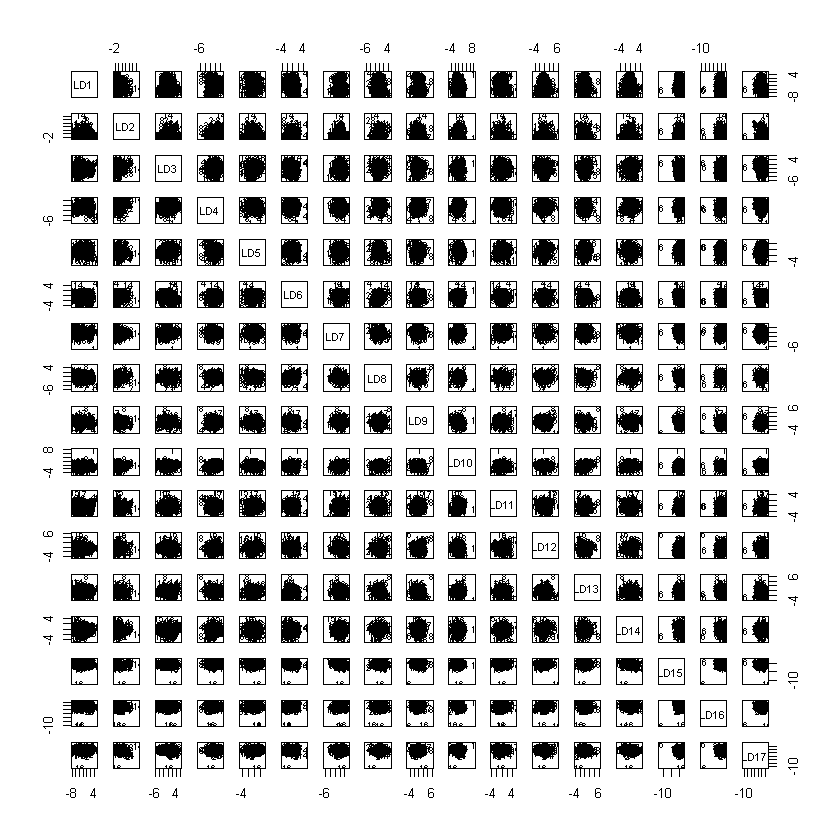

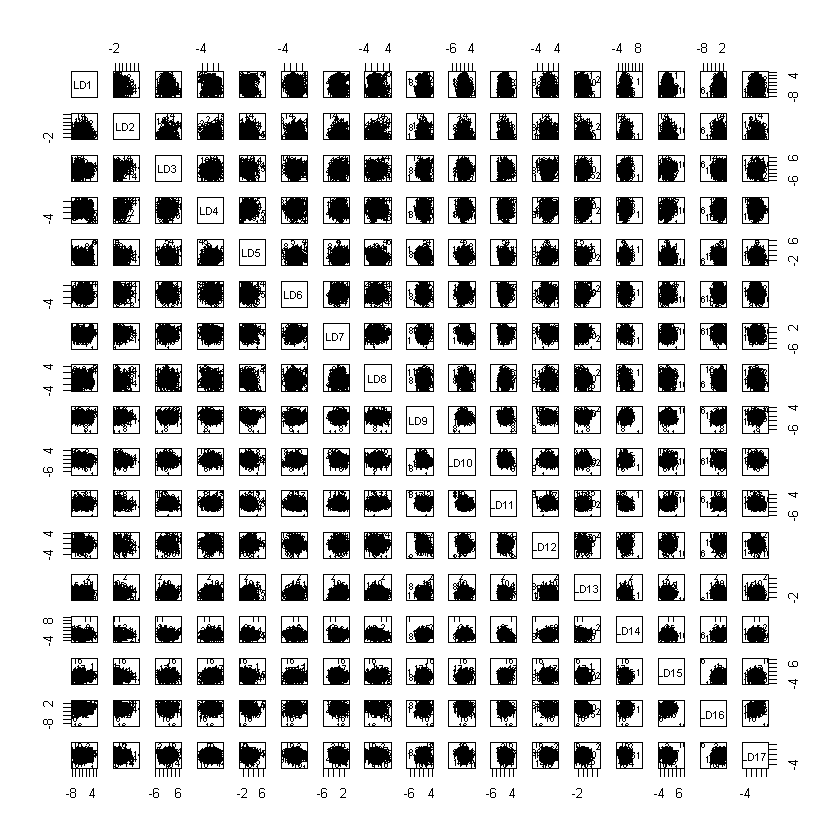

In [26]:
plot(model)
plot(model.impute)
#TODO a better way to do this 

In [27]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 4 4 4 4 4 2
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,2.563184e-02,3.046434e-09,4.747030e-06,0.8446985369,1.296532e-01,3.346078e-07,8.383928e-06,1.784713e-11,8.059870e-10,2.792167e-06,1.350486e-07,1.603604e-09,6.892004e-18,4.931659e-25,2.383540e-25,2.339349e-15,2.842412e-14,6.291500e-16
2,1.193942e-02,3.618329e-06,6.125351e-02,0.7124133177,1.709968e-01,3.412209e-02,5.375846e-03,5.831589e-08,2.613443e-04,2.735588e-03,6.373262e-04,2.610751e-04,7.720292e-12,6.244206e-20,2.547086e-18,5.594913e-11,1.645947e-09,7.543473e-10
3,9.128892e-05,1.438350e-07,5.671084e-03,0.5393427889,4.542103e-01,5.188867e-06,1.199240e-05,8.081306e-06,1.967299e-05,3.591175e-04,2.749470e-04,5.420358e-06,9.638890e-16,1.619376e-18,2.078199e-19,6.917875e-12,1.307099e-10,1.631176e-11
4,7.233061e-02,6.337573e-07,1.261607e-03,0.6048384088,3.192843e-01,4.156118e-04,7.900136e-04,1.659487e-07,1.121931e-05,8.320438e-04,2.302671e-04,5.121130e-06,1.692362e-14,1.366326e-19,1.244060e-19,1.349526e-12,6.481827e-11,4.442257e-11
8,7.429319e-02,3.689294e-09,5.094410e-04,0.8141200803,1.106352e-01,3.347817e-05,1.177762e-04,1.964951e-10,1.632507e-06,2.823458e-04,6.483005e-06,4.013694e-07,7.256261e-17,1.512210e-24,2.561380e-22,1.347298e-13,6.225115e-13,1.298836e-13
16,8.239857e-07,9.466350e-01,1.635925e-02,0.0002192756,1.342181e-05,3.677175e-02,7.593725e-08,1.298468e-07,7.929837e-08,1.169474e-08,1.420459e-08,1.270434e-07,1.465359e-09,1.815684e-15,2.036016e-17,1.376359e-11,1.851263e-10,1.409005e-10


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9,LD10,LD11,LD12,LD13,LD14,LD15,LD16,LD17
1,4.686563,-1.17743380,1.7437685,-2.2156647,-2.4284954,2.2978716,1.5086349,-1.4741362,-0.5732509,-1.7751051,2.0279829,0.64772216,0.2152745,0.3108886,-0.2989961,-0.4007057,0.18403035
2,3.419036,-0.95288124,0.1479340,-1.1557849,0.6578425,0.8825273,-0.3369798,-0.2812531,0.5498022,-0.8242719,0.7559910,-0.29208782,-0.1137635,0.9944283,-1.0204930,-0.2687408,-1.46959833
3,3.468989,-0.08094256,0.4482848,-0.6838793,-2.5411074,-0.2565207,1.8788868,0.3122796,0.8272792,0.5821056,-0.4470183,-0.03542746,0.4822181,-0.4152568,-0.4031551,0.3609195,-0.07576924


|species|spec_as_int|
|---|---|
|acerifolia_x|1|
|aestivalis_x|2|
|cinerea_x|3|
|labrusca_x|4|
|palmata_x|5|
|riparia_x|6|
|rupestris_x|7|
|vulpina_x|8|
|acerifolia_y|9|
|aestivalis_y|10|
|cinerea_y|11|
|labrusca_y|12|
|palmata_y|13|
|riparia_y|14|
|rupestris_y|15|
|vulpina_y|16|
acerifolia_z|17|
|aestivalis_z|18|
|cinerea_z|19|
|labrusca_z|20|
|palmata_z|21|
|riparia_z|22|
|rupestris_z|23|
|vulpina_z|24|

In [28]:
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
confusionMatrix(table)

Confusion Matrix and Statistics

         Species
Predicted  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
       1   0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0
       2   0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
       3   0  0  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
       4   5  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0
       5   0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
       6   0  0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0
       7   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
       8   0  0  0  0  0  1  0  6  0  0  0  0  0  1  0  0  0  0
       9   0  0  1  0  0  0  0  0  3  1  0  1  0  0  0  0  0  0
       10  0  0  0  1  0  0  2  0  0 10  2  0  0  0  0  0  0  0
       11  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0  0  0  0
       12  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1
       13  0  0  0  0  0  0  0  0  0  0  0  0  1  0  2  1  0  0
       14  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0